In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.test.is_built_with_cuda()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15771414393727837780
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16488240958662785787
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4843280793
locality {
  bus_id: 1
  links {
  }
}
incarnation: 192812662465204463
physical_device_desc: "device: 0, name: GeForce GTX 1660, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9006874167144320333
physical_device_desc: "device: XLA_GPU device"
]


True

In [2]:
import keras, os
import tensorflow as tf
from keras.models import Sequential,load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import joblib
import numpy as np
import tensorflowjs as tfjs
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.3


In [3]:
trdata = ImageDataGenerator(rescale=1./255)
'''trdata = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)'''
#traindata = trdata.flow_from_directory(directory="C:/Users/user/Desktop/traindata", target_size=(128,128))
traindata = trdata.flow_from_directory(directory="D:/train_", target_size=(128,128) , batch_size = 25)

tsdata = ImageDataGenerator(rescale=1./255)
#testdata = tsdata.flow_from_directory(directory="C:/Users/user/Desktop/testdata", target_size=(128,128))
testdata = tsdata.flow_from_directory(directory="D:/test_", target_size=(128,128), batch_size = 25)

Found 20942 images belonging to 4 classes.
Found 6386 images belonging to 4 classes.


In [4]:
model = Sequential()
# Feature Extractor - 특징 추출
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
'''model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))'''
model.add(Flatten()) # 1차원으로 변환해서
#Classifier
model.add(Dense(128, activation='relu')) # 은닉 레이어 걸쳤다가
tf.keras.layers.Dropout(rate=0.3),
model.add(Dense(4, activation='softmax'))  # 다중 클래스로 분류

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [6]:
from keras.optimizers import Adam
opt = Adam(lr=1e-5)
#sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer= 'adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("20201103_Con2D_01", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='accuracy', patience=10, verbose=1, mode='auto')
hist = model.fit_generator(
        traindata,
        steps_per_epoch=100,
        epochs=500,
        validation_data=testdata,
        validation_steps=100,
        callbacks=[checkpoint, early])
model.save('C:/Users/user/Desktop/model/Con2D_model_4Category_more_batch_20_15.h5')
#tfjs.converters.save_keras_model(model,'C:/Users/user/Desktop/model/js')
#joblib.dump(model,'C:/Users/user/Desktop/model/model.pkl')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
100/100 [==============================] - 240s 2s/step - loss: 0.9463 - accuracy: 0.5352 - val_loss: 0.6207 - val_accuracy: 0.6868
Epoch 2/500
100/100 [==============================] - 230s 2s/step - loss: 0.7171 - accuracy: 0.6344 - val_loss: 0.6381 - val_accuracy: 0.6844
Epoch 3/500
100/100 [==============================] - 238s 2s/step - loss: 0.6650 - accuracy: 0.6764 - val_loss: 0.5916 - val_accuracy: 0.7100
Epoch 4/500
100/100 [==============================] - 231s 2s/step - loss: 0.6194 - accuracy: 0.7040 - val_loss: 0.5721 - val_accuracy: 0.7184
Epoch 5/500
100/100 [==============================] - 227s 2s/step - loss: 0.5446 - accuracy: 0.7436 - val_loss: 0.4895 - val_accuracy: 0.7672
Epoch 6/500
100/100 [==============================] - 224s 2s/step - loss: 0.5014 - accuracy: 0.7636 - val_loss: 0.4577 - val_accuracy: 0.7848
Epoch 7/500
100/100 [==============================] - 239s 

Epoch 26/500
100/100 [==============================] - 224s 2s/step - loss: 0.1625 - accuracy: 0.9332 - val_loss: 0.2942 - val_accuracy: 0.8812
Epoch 27/500
100/100 [==============================] - 228s 2s/step - loss: 0.1582 - accuracy: 0.9356 - val_loss: 0.2896 - val_accuracy: 0.8820
Epoch 28/500
100/100 [==============================] - 224s 2s/step - loss: 0.1458 - accuracy: 0.9464 - val_loss: 0.2558 - val_accuracy: 0.8976
Epoch 29/500
100/100 [==============================] - 226s 2s/step - loss: 0.1409 - accuracy: 0.9428 - val_loss: 0.3371 - val_accuracy: 0.8820
Epoch 30/500
100/100 [==============================] - 226s 2s/step - loss: 0.1249 - accuracy: 0.9524 - val_loss: 0.3193 - val_accuracy: 0.8756
Epoch 31/500
100/100 [==============================] - 228s 2s/step - loss: 0.1359 - accuracy: 0.9476 - val_loss: 0.3652 - val_accuracy: 0.8644
Epoch 32/500
100/100 [==============================] - 226s 2s/step - loss: 0.1255 - accuracy: 0.9512 - val_loss: 0.3344 - val_ac

Epoch 53/500
100/100 [==============================] - 234s 2s/step - loss: 0.0622 - accuracy: 0.9752 - val_loss: 0.2854 - val_accuracy: 0.9056
Epoch 54/500
100/100 [==============================] - 235s 2s/step - loss: 0.0577 - accuracy: 0.9808 - val_loss: 0.3643 - val_accuracy: 0.8960
Epoch 55/500
100/100 [==============================] - 229s 2s/step - loss: 0.0339 - accuracy: 0.9880 - val_loss: 0.3719 - val_accuracy: 0.8912
Epoch 56/500
100/100 [==============================] - 229s 2s/step - loss: 0.0516 - accuracy: 0.9812 - val_loss: 0.3855 - val_accuracy: 0.8736
Epoch 57/500
100/100 [==============================] - 226s 2s/step - loss: 0.0442 - accuracy: 0.9840 - val_loss: 0.4142 - val_accuracy: 0.8972
Epoch 58/500
100/100 [==============================] - 229s 2s/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.3722 - val_accuracy: 0.9000
Epoch 59/500
100/100 [==============================] - 229s 2s/step - loss: 0.0679 - accuracy: 0.9756 - val_loss: 0.4482 - val_ac

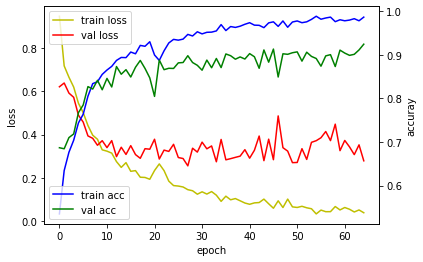

In [8]:
import matplotlib.pyplot as plt
 
fig, loss_ax = plt.subplots()
 
acc_ax = loss_ax.twinx()
 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
#loss_ax.set_ylim([0.0, 0.5])
 
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
#acc_ax.set_ylim([0.8, 1.0])
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()

In [9]:
model = load_model('C:/Users/user/Desktop/model/Con2D_model_4Category_more_batch_20_15.h5')
#model = load_model('F:/KT_DS/Project/large_model.h5')

In [10]:
print("-- Evaluate --")
test = tsdata.flow_from_directory(directory="D:/pradict", target_size=(128,128))
scores = model.evaluate_generator(
            test,
            steps = 10)
 
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" %(model.metrics_names[0], scores[0]*100))
print(model.metrics_names)
 
# 모델 예측하기
print("-- Predict --")
 
output = model.predict_generator(
            test)
print(test.class_indices)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
 
print(output)
print(test.filenames)

-- Evaluate --
Found 3073 images belonging to 4 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
accuracy: 87.50%
loss: 58.67%
['loss', 'accuracy']
-- Predict --
Instructions for updating:
Please use Model.predict, which supports generators.
{'Axe': 0, 'Knife': 1, 'Saw': 2, 'Scissors': 3}
[[0.000 0.000 0.000 1.000]
 [0.000 0.000 0.925 0.075]
 [0.000 0.750 0.000 0.250]
 ...
 [0.000 0.000 1.000 0.000]
 [0.000 1.000 0.000 0.000]
 [0.000 0.000 0.000 1.000]]
['Axe\\H_8201.40-0000_01_311.png', 'Axe\\H_8201.40-0000_01_312.png', 'Axe\\H_8201.40-0000_01_313.png', 'Axe\\H_8201.40-0000_01_314.png', 'Axe\\H_8201.40-0000_01_315.png', 'Axe\\H_8201.40-0000_01_316.png', 'Axe\\H_8201.40-0000_01_317.png', 'Axe\\H_8201.40-0000_01_318.png', 'Axe\\H_8201.40-0000_01_319.png', 'Axe\\H_8201.40-0000_01_320.png', 'Axe\\H_8201.40-0000_01_321.png', 'Axe\\H_8201.40-0000_01_322.png', 'Axe\\H_8201.40-0000_01_323.png', 'Axe\\H_8201.40-0000_01_324.png', 'Axe\\H_8201.40-0000_01_

In [178]:
from PIL import Image
import numpy as np
import PIL.Image as pilimg
a = pilimg.open('C:/Users/User/Desktop/test/Gun1/H_8424.20-1000_01_149.png',size=(128,128) )
ap = np.array(a)
#test_num = Image.open('C:/Users/User/Desktop/test/Gun1/H_8424.20-1000_01_149.png')
#tsdata = ImageDataGenerator(rescale=1./255)
output = model.predict_generator(
            ap)
#test_num = test_num[:,:,0]
#test_num = (test_num > 125) * test_num
#test_num = test_num.astype('float32') / 255.

#plt.imshow(test_num, cmap='Greys', interpolation='nearest');

#test_num = test_num.reshape((1, 28, 28, 1))

# = model.predict_generator(test_num)
#scores = model.predict_generator(test_num)

print(output)

TypeError: open() got an unexpected keyword argument 'size'

In [3]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

#caltech_dir = "./multi_img_data/imgs_others_test"
image_w = 128
image_h = 128

pixels = image_h * image_w * 3

X = []
'''filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):'''
img = Image.open('C:/Users/User/Desktop/test/Gun1/H_8424.20-1000_01_149.png')
img = img.convert("RGB")
img = img.resize((image_w, image_h))
data = np.asarray(img)
#filenames.append('C:/Users/User/Desktop/test/Gun1/H_8424.20-1000_01_149.png')
X.append(data)

X = np.array(X)
model = load_model('C:/Users/user/Desktop/model/2020-10-27_Con2D_model_batch10_opt_nonargue.h5')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "총"
    elif pre_ans == 1: pre_ans_str = "칼"
    elif pre_ans == 2: pre_ans_str = "스마트폰"
    else: pre_ans_str = "없음"
    if i[0] >= 0.8 : print("해당 "+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    #if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.

[1.000 0.000 0.000]
0
해당 이미지는 총으로 추정됩니다.
